In [1]:
from tensorflow.keras.models import load_model
model = load_model('cats_and_dogs_small_1.h5')

# visualize feature maps with three dimensions: width, height, depth(channels)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [2]:
img_path = 'cat_dog_data_small/test/cats/cat.1700.jpg'

# Preprocesses the image into a 4D tensor
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs that were preprocessed this way
img_tensor /= 255.

img_tensor.shape

(1, 150, 150, 3)

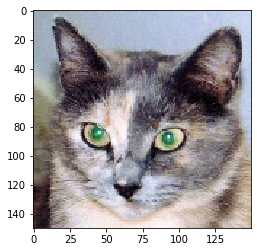

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [4]:
from tensorflow.keras import models

# extracts the outputs of the top eight layers
layer_outputs = [layer.output for layer in model.layers[:8]]

# creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [5]:
# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

In [6]:
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 148, 148, 32)

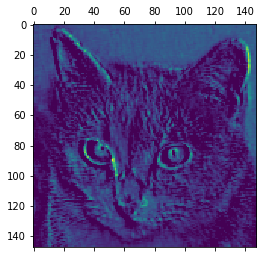

In [7]:
import matplotlib.pyplot as plt

# Fourth channel of the activation of the first layer on the test cat picture
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

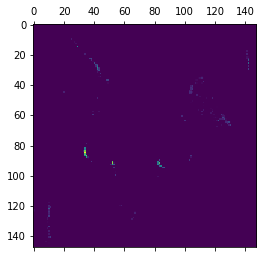

In [8]:
# Seventh channel of the activation of the first layer on the test cat picture
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

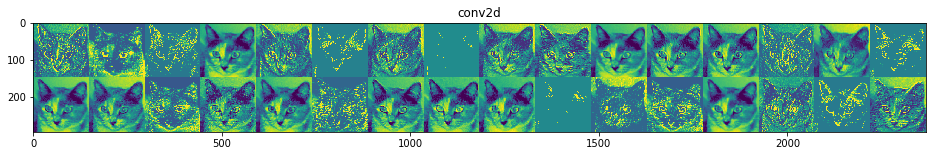

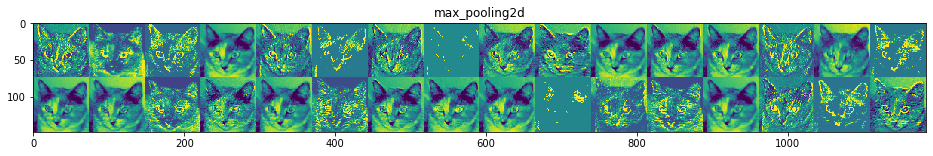

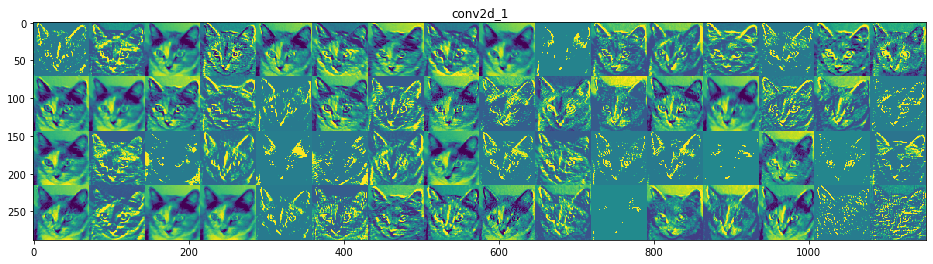

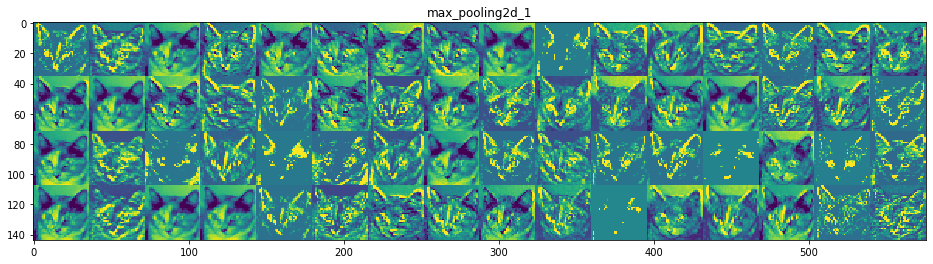

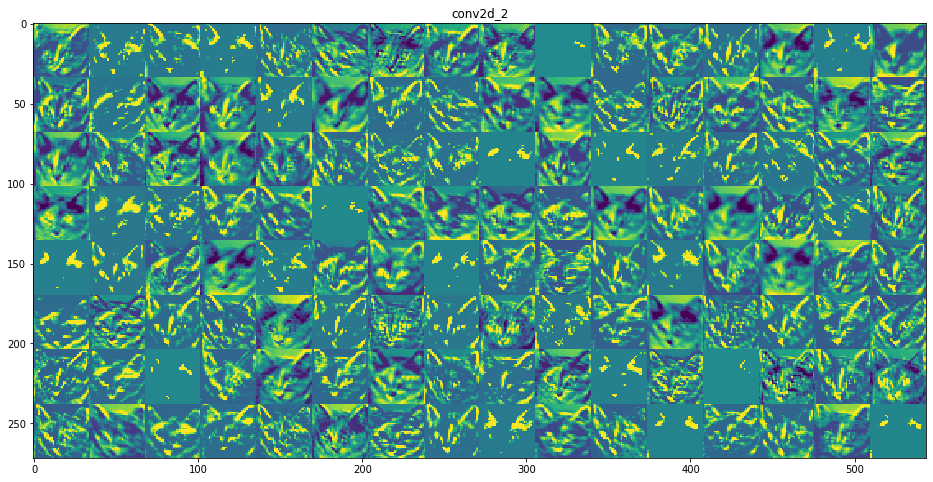

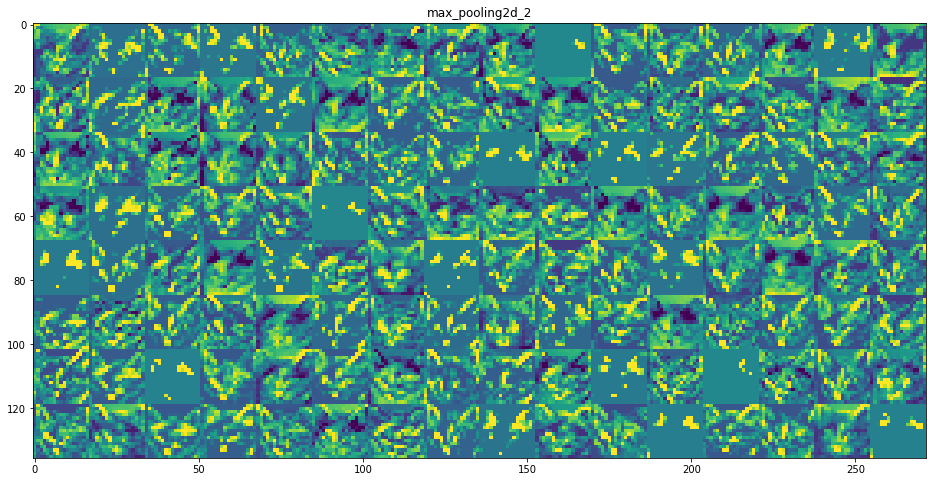

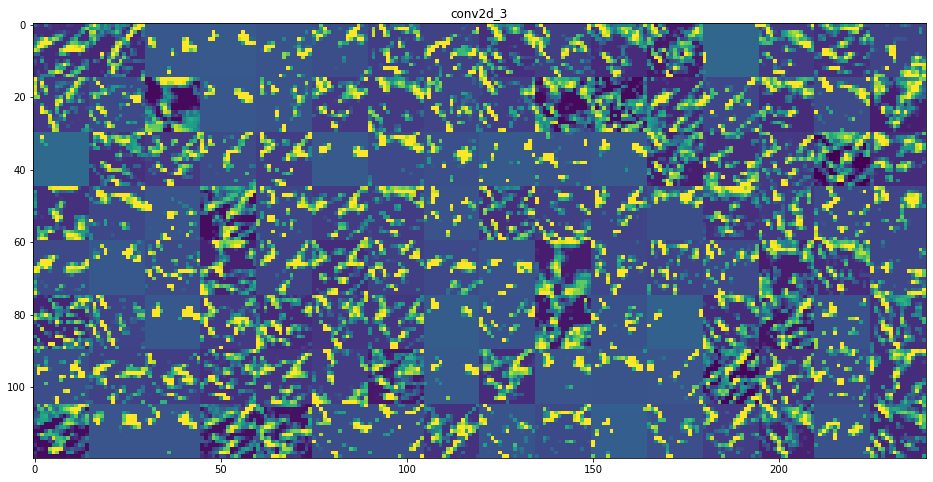

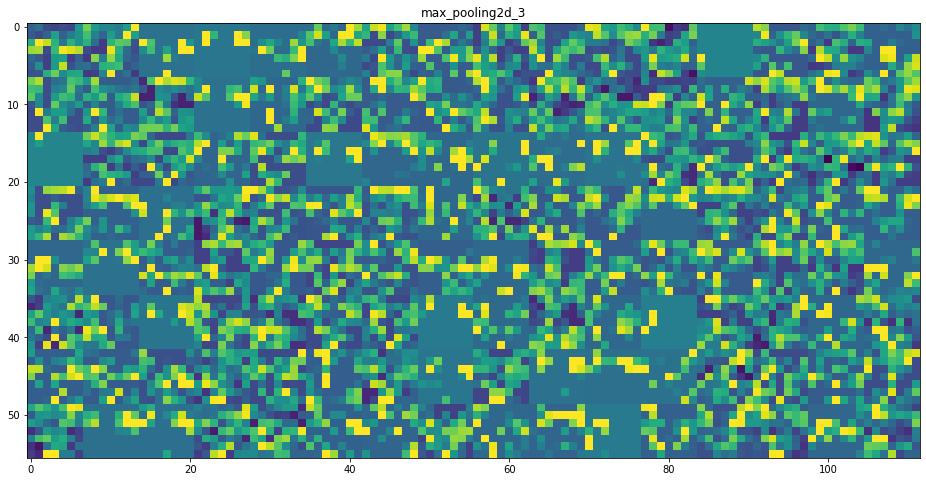

In [11]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    # number of features in the feature map
    n_features = layer_activation.shape[-1]
    
    # feature mape has shape(1, size, size, n_features)
    size = layer_activation.shape[1]
    
    # tiles the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    # tiles each filter into a big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[
                col * size : (col + 1) * size,
                row * size : (row + 1) * size
            ] = channel_image
            
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                         scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')